In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2022-02-14 19:24:05.584871: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-14 19:24:05.584910: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'A boot']

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
len(X_train)

60000

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
y_train.shape

(60000,)

In [8]:
len(y_train)

60000

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
len(X_test)

10000

In [11]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
y_test.shape


(10000,)

In [13]:
len(y_test)

10000

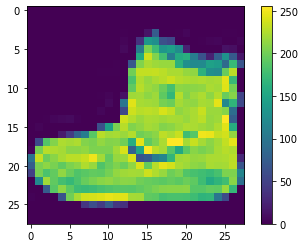

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
import numpy as np 

In [17]:
np.argmax(X_train)

417

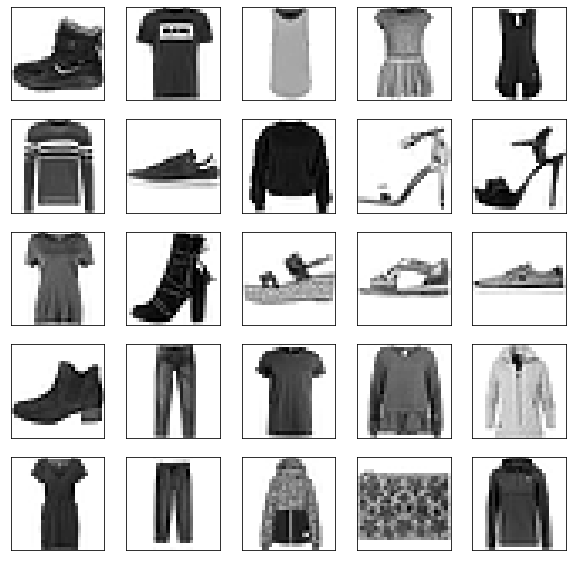

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
#     plt.xlabel(class_names[y_train[i]])
# plt.show()

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [20]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X_train_flattened.shape

(60000, 784)

In [22]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

2022-02-14 19:24:10.578763: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-14 19:24:10.578840: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (office2-B85M-D2V-SI): /proc/driver/nvidia/version does not exist


In [24]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4998 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3769 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8910


In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6006 - accuracy: 0.7992
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4619 - accuracy: 0.8415
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4366 - accuracy: 0.8497
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4233 - accuracy: 0.8533
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4131 - accuracy: 0.8583


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.8437


[0.45088350772857666, 0.8436999917030334]

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([5.6517124e-04, 1.9311905e-04, 7.8081787e-03, 3.6514699e-03,
       8.1384480e-03, 9.8570168e-01, 1.8565178e-02, 9.8090667e-01,
       7.8228068e-01, 9.9782485e-01], dtype=float32)

In [29]:
test_loss, test_acc = model.evaluate(X_test_flattened,  y_test, verbose=2)

print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

313/313 - 0s - loss: 0.4509 - accuracy: 0.8437 - 390ms/epoch - 1ms/step
Test accuracy: 0.8436999917030334 
Test loss: 0.45088350772857666


In [30]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(X_test_flattened)

In [32]:
predictions[0]

array([0.06144258, 0.06141972, 0.06188922, 0.0616325 , 0.06190967,
       0.16455413, 0.06255855, 0.16376698, 0.13426542, 0.16656119],
      dtype=float32)

In [33]:
np.argmax(y_predicted[0])

9

In [34]:
np.argmax(predictions[0])

9

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [36]:
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[854,   3,  14,  32,  11,   0,  75,   0,  11,   0],
       [  3, 960,   4,  24,   6,   0,   1,   0,   2,   0],
       [ 22,   6, 749,   6, 147,   1,  65,   0,   4,   0],
       [ 43,  17,  25, 816,  59,   0,  35,   1,   4,   0],
       [  0,   0, 109,  21, 814,   0,  52,   0,   4,   0],
       [  0,   0,   0,   1,   0, 895,   0,  62,   2,  40],
       [169,   3, 144,  26, 137,   0, 507,   0,  14,   0],
       [  0,   0,   0,   0,   0,  24,   0, 939,   0,  37],
       [  4,   1,   6,   9,   4,   4,  19,   5, 948,   0],
       [  0,   0,   0,   0,   0,   6,   1,  38,   0, 955]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

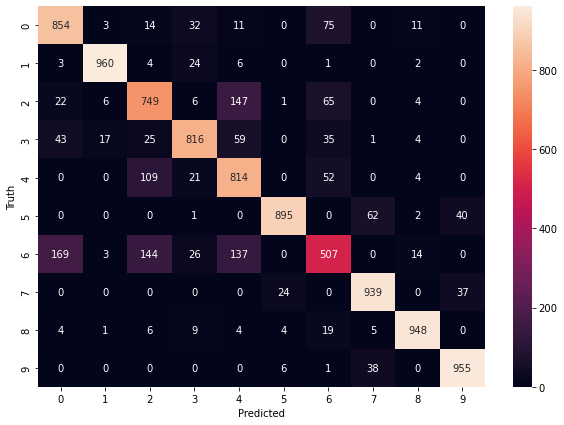

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4982 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3421 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3173 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2978 - accuracy: 0.8900


In [40]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8719


[0.3491111695766449, 0.8719000220298767]

Text(69.0, 0.5, 'Truth')

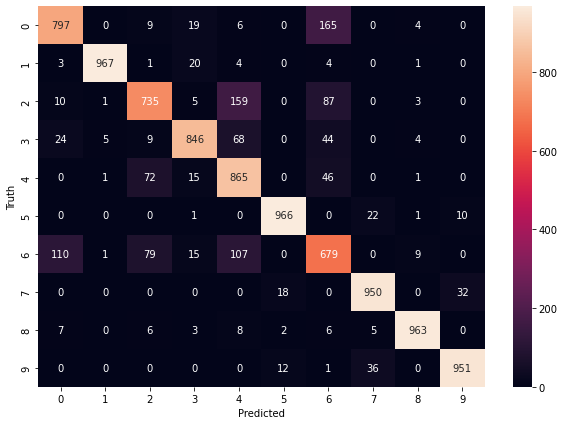

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5051 - accuracy: 0.8242
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3785 - accuracy: 0.8630
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.8766
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3181 - accuracy: 0.8831
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.8901
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2856 - accuracy: 0.8948
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2746 - accuracy: 0.8992
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2627 - accuracy: 0.9024
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2544 - accuracy: 0.9051
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.244

In [47]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3842 - accuracy: 0.8934


[0.38423147797584534, 0.8934000134468079]

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
